<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 

<center>Author: [Yury Kashnitskiy](http://yorko.github.io) <br>
Translated and edited by [Sergey Isaev](https://www.linkedin.com/in/isvforall/), [Artem Trunov](https://www.linkedin.com/in/datamove/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina/), and [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/) <br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# <center> Assignment #1 (demo)
## <center>  Exploratory data analysis with Pandas


**In this task you should use Pandas to answer a few questions about the [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) dataset. (You don't have to download the data – it's already here). Choose the answers in the [web-form](https://docs.google.com/forms/d/1uY7MpI2trKx6FLWZte0uVh3ULV4Cm_tDud0VDFGCOKg). This is a demo version of an assignment, so by submitting the form, you'll see a link to the solution .ipynb file.**

Unique values of all features (for more information, please see the links above):
- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.   
- `salary`: >50K,<=50K

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [79]:
data = pd.read_csv('/Users/subha/Downloads/adult.data.csv')
data.head()


,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [80]:
print(data.shape)

(32561, 15)


**1. How many men and women (*sex* feature) are represented in this dataset?** 

In [81]:
# You code here
f= data[data.sex == ' Female']['age'].count()
print('Female count: ', f)
m= data[data.sex == ' Male']['age'].count()
print('Male count: ', m)

Female count:  10771
Male count:  21790
sum 32561


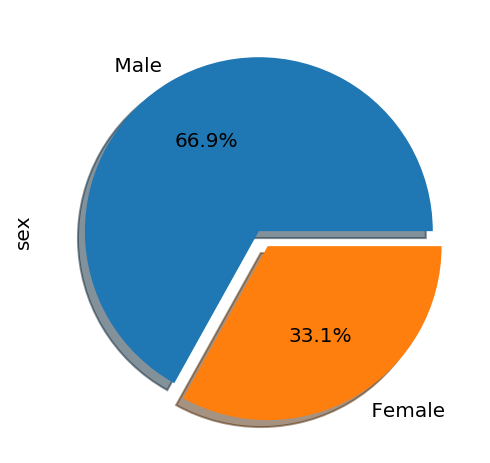

In [82]:
(data['sex']).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

**2. What is the average age (*age* feature) of women?**

In [87]:
# You code here
#data[data['sex'] == 'Male']
avgf = data[data['sex'] == ' Female']['age'].mean()
print('average age female: ', avgf)

average age female:  36.85823043357163


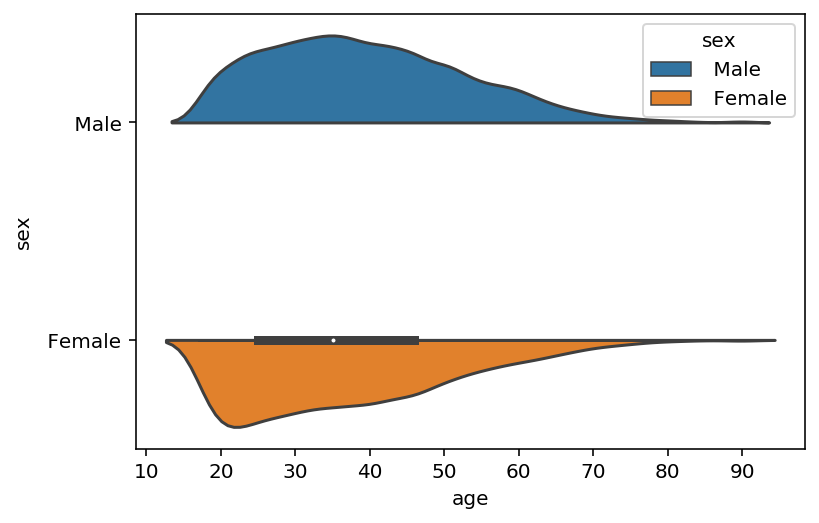

In [113]:
#sns.countplot(x='age', hue='sex',data=data)
sns.violinplot("age", "sex", hue="sex", data=data,split=True)


**3. What is the percentage of German citizens (*native-country* feature)?**

In [47]:
# You code here
g_citizens = data[data['native-country'] == ' Germany']['native-country'].count()
tot = data['native-country'].count()
avg_g_cit = (g_citizens/tot) *100
avg_g_cit


0.42074874850281013

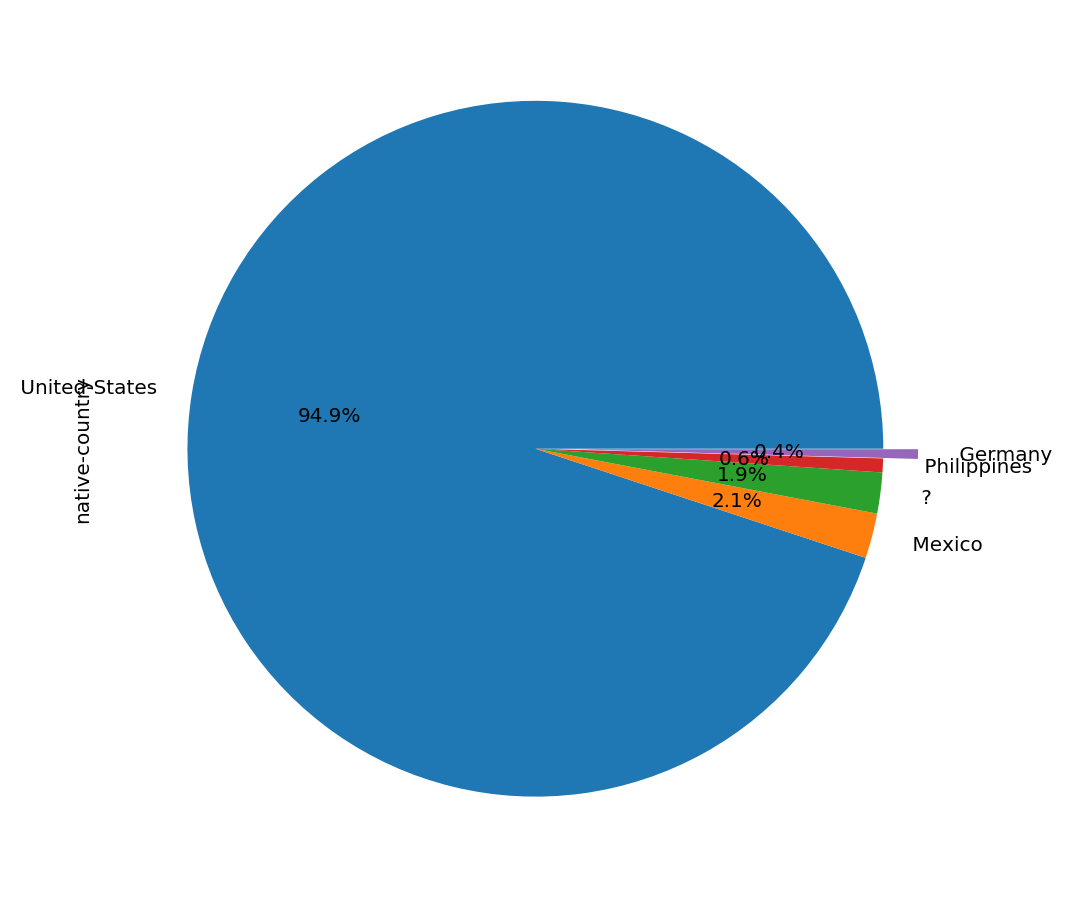

In [123]:
(data['native-country']).value_counts()[:5].plot.pie(explode=[0,0,0,0,0.1],autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(19,8)

**4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (*salary* feature) and those who earn less than 50K per year?**

In [52]:
import numpy as np
data.groupby(['salary'])['age'].agg([np.mean, np.std])

,mean,std
salary,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


**6. Is it true that people who earn more than 50K have at least high school education? (*education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* or *Doctorate* feature)**

In [53]:
# You code here
pd.crosstab(data['salary'], data['education'])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
salary,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387


**7. Display age statistics for each race (*race* feature) and each gender (*sex* feature). Use *groupby()* and *describe()*. Find the maximum age of men of *Amer-Indian-Eskimo* race.**

In [10]:
race=data.groupby([' race', 'sex'])['age'].describe()
print(race)
AIE = data.loc[(data[" race"] == " Amer-Indian-Eskimo") & (data["sex"] == " Male")]['age'].max()
print('The maximum age of men of Amer-Indian-Eskimo race:',AIE)

                               count       mean        std   min   25%   50%  \
 race               sex                                                        
 Amer-Indian-Eskimo  Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                     Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
 Asian-Pac-Islander  Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                     Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
 Black               Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                     Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
 Other               Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                     Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
 White               Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                     Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                               75%   ma

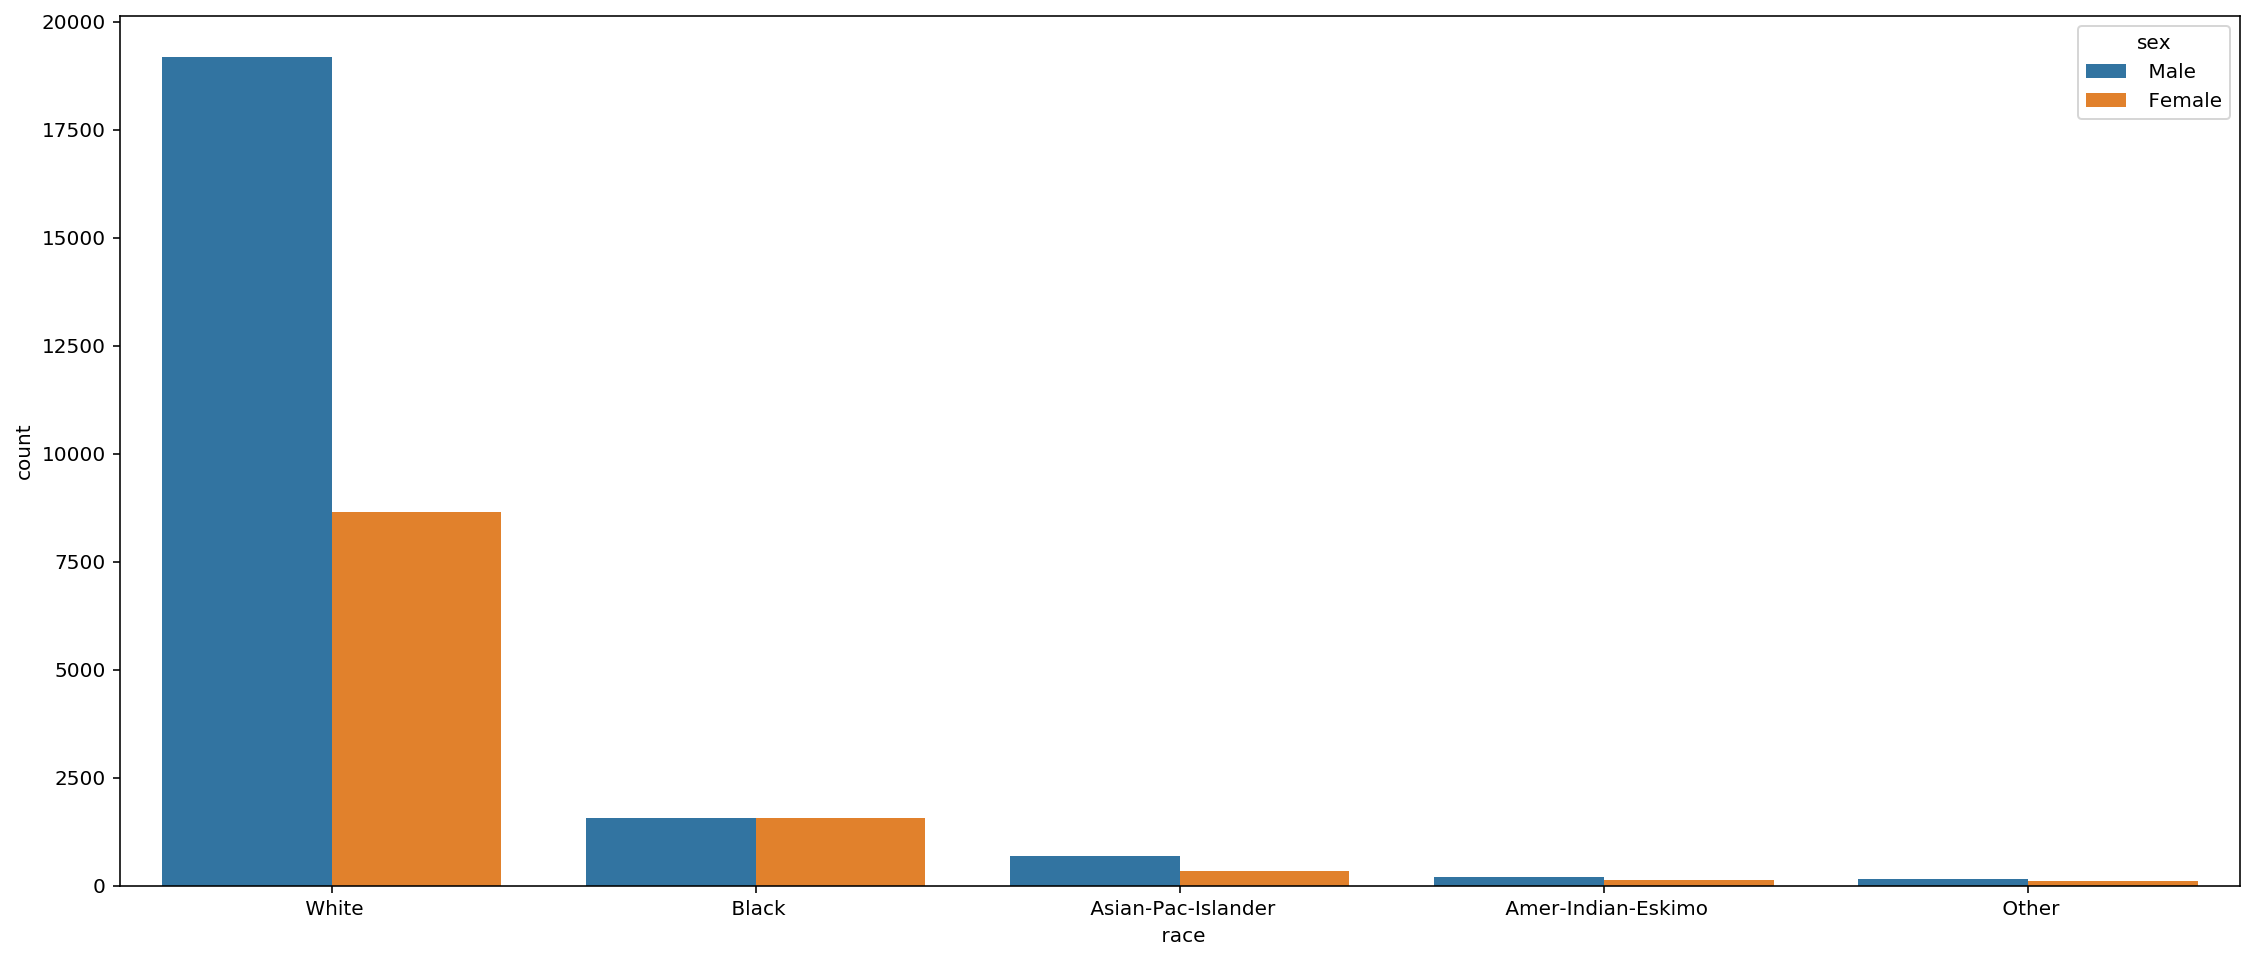

In [153]:
sns.countplot(x=' race', hue='sex',data=data)
fig=plt.gcf()
fig.set_size_inches(19,8)

**8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (*marital-status* feature)? Consider as married those who have a *marital-status* starting with *Married* (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [54]:
# You code here
marriedAF = data[(data['maritalstatus'] == ' Married-AF-spouse') & (data['salary'] == ' >50K')]['sex'].count()
marriedciv = data[(data['maritalstatus'] == ' Married-civ-spouse') & (data['salary'] == ' >50K')]['sex'].count()
marriedabs = data[(data['maritalstatus'] == ' Married-spouse-absent') & (data['salary'] == ' >50K')]['sex'].count()
totalmarried = marriedAF + marriedciv + marriedabs
print('The proportion of those who earn a lot (>50K) greater with status married ',totalmarried)
Divorced = data[(data['maritalstatus'] == ' Divorced') & (data['salary'] == ' >50K')]['sex'].count()
nevmarried = data[(data['maritalstatus'] == ' Never-married') & (data['salary'] == ' >50K')]['sex'].count()
separated = data[(data['maritalstatus'] == ' Separated') & (data['salary'] == ' >50K')]['sex'].count()
widowed = data[(data['maritalstatus'] == ' Widowed') & (data['salary'] == ' >50K')]['sex'].count()
totalbachelor = Divorced + nevmarried + separated + widowed
print('The proportion of those who earn a lot (>50K) greater with status single ',totalbachelor)


The proportion of those who earn a lot (>50K) greater with status married  6736
The proportion of those who earn a lot (>50K) greater with status single  1105


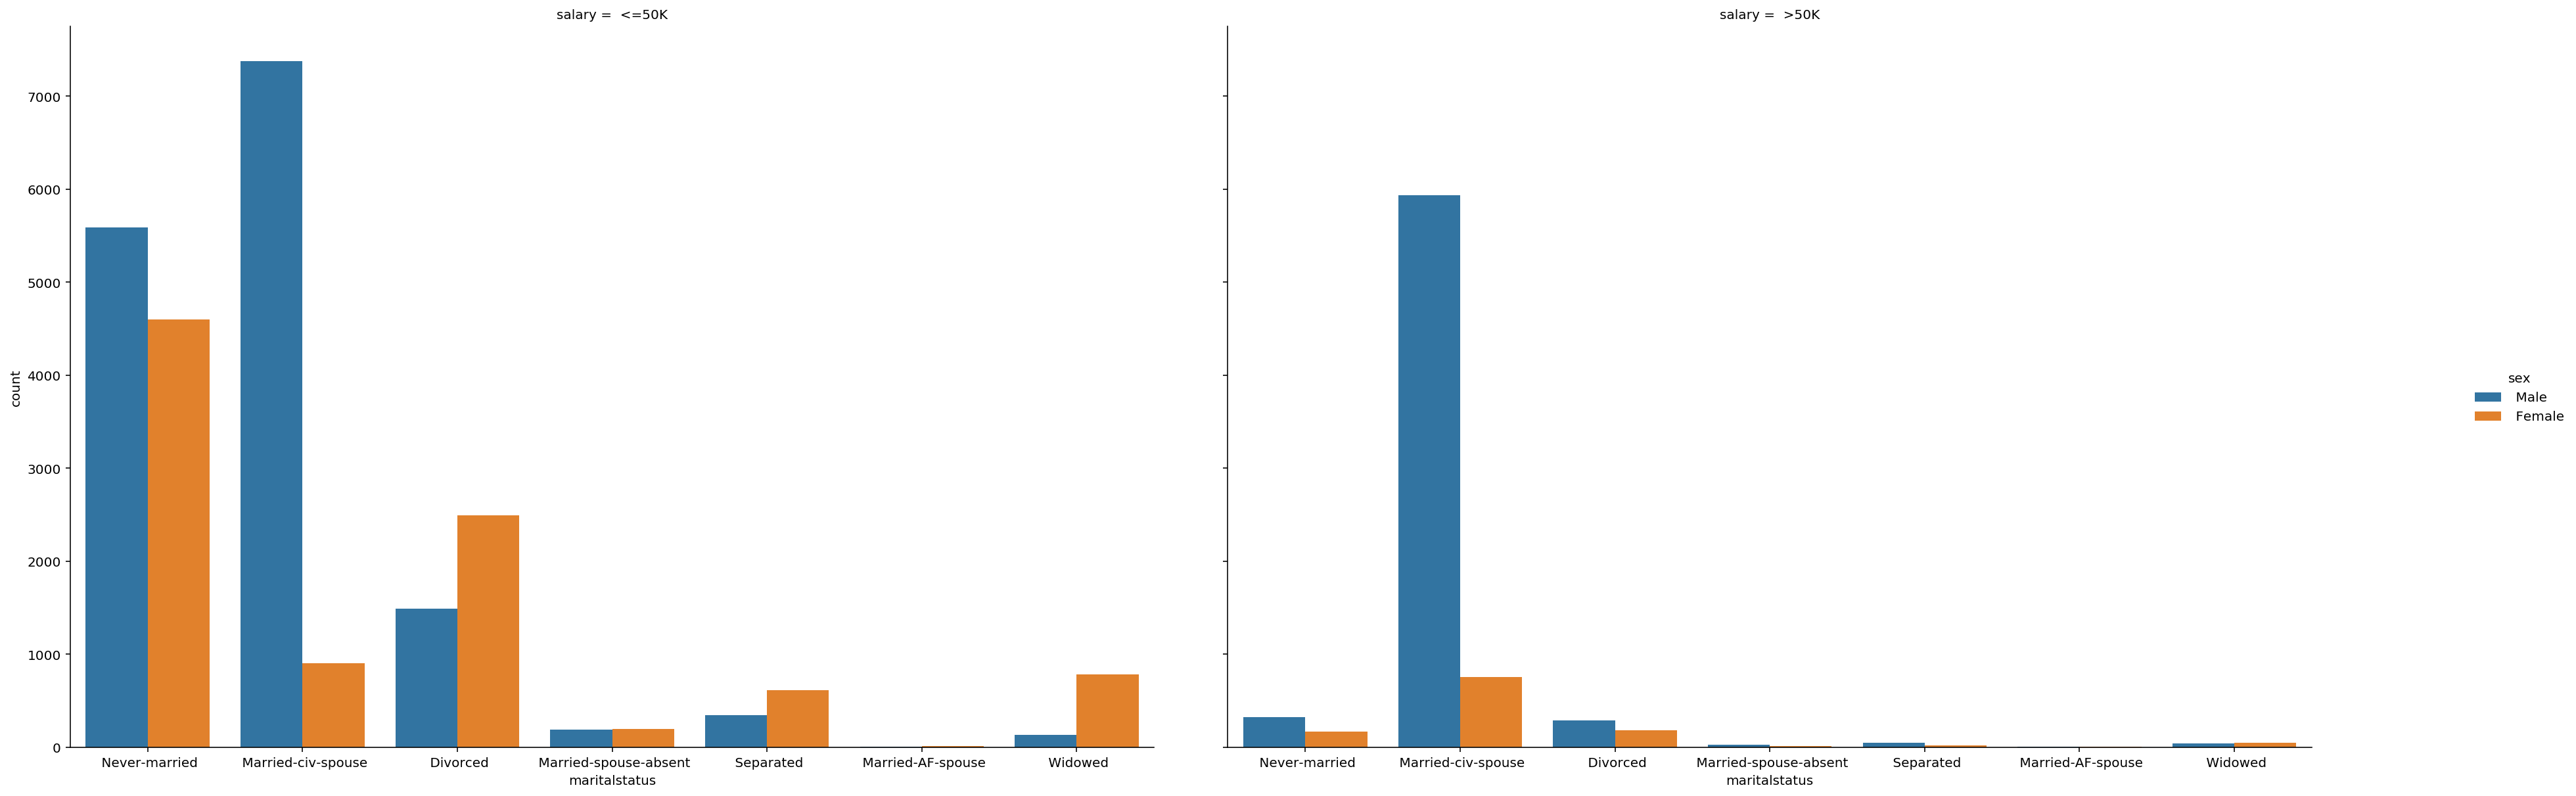

In [73]:
sns.catplot(x="maritalstatus", hue="sex", col="salary",
                data=data, kind="count",
                height=6, aspect=.9);
fig=plt.gcf()
fig.set_size_inches(28,9)

**9. What is the maximum number of hours a person works per week (*hours-per-week* feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?**

In [154]:
hpp = data['hours-per-week'].max()
x= data[data['hours-per-week'] == 99]['hours-per-week'].count()
print("Maximum no. of hours a person works per week :",hpp)
print(x,"people work",hpp,"hours")
x_hpp=data[(data['salary'] >= ' >50K') & (data['hours-per-week'] == 99)]["hours-per-week"].count()
percentage=(x_hpp/x)*100
print("percentage: ",percentage)
                  

Maximum no. of hours a person works per week : 99
85 people work 99 hours
percentage:  29.411764705882355


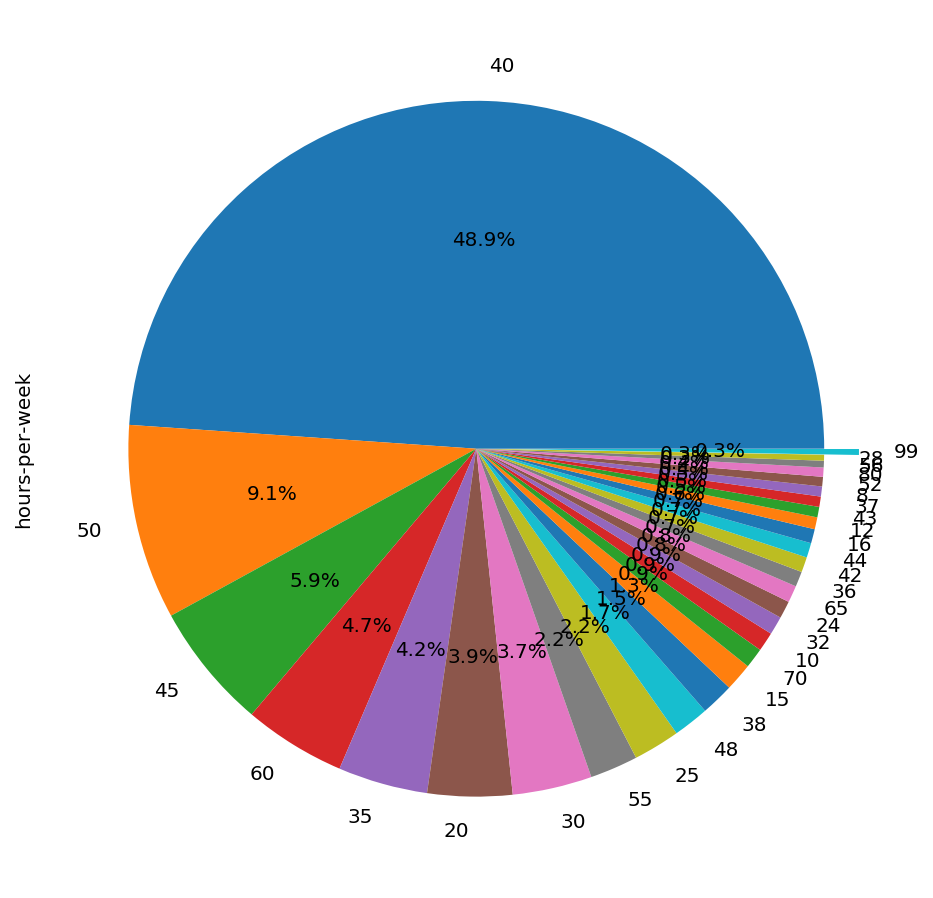

In [181]:
(data['hours-per-week']).value_counts()[:30].plot.pie(explode=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1],autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(25,8)


**10. Count the average time of work (*hours-per-week*) for those who earn a little and a lot (*salary*) for each country (*native-country*). What will these be for Japan?**

In [14]:
country=data.groupby(['native-country', 'salary'])['hours-per-week'].mean()
pd.set_option('display.max_rows', country.shape[0]+1)
print(country)
minhrs = data[(data['native-country'] == ' Japan') & (data['salary'] == ' <=50K')]['hours-per-week'].mean()
print("avg no. of hours a person works per week with less salary:",minhrs)
maxhrs = data[(data['native-country'] == ' Japan') & (data['salary'] == ' >50K')]['hours-per-week'].mean()
print("avg no. of hours a person works per week with more salary:",maxhrs)


avg no. of hours a person works per week with more salary: 45.473026399693914
native-country               salary
 ?                            <=50K    40.164760
                              >50K     45.547945
 Cambodia                     <=50K    41.416667
                              >50K     40.000000
 Canada                       <=50K    37.914634
                              >50K     45.641026
 China                        <=50K    37.381818
                              >50K     38.900000
 Columbia                     <=50K    38.684211
                              >50K     50.000000
 Cuba                         <=50K    37.985714
                              >50K     42.440000
 Dominican-Republic           <=50K    42.338235
                              >50K     47.000000
 Ecuador                      <=50K    38.041667
                              >50K     48.750000
 El-Salvador                  <=50K    36.030928
                              >50K     45.000000
 En

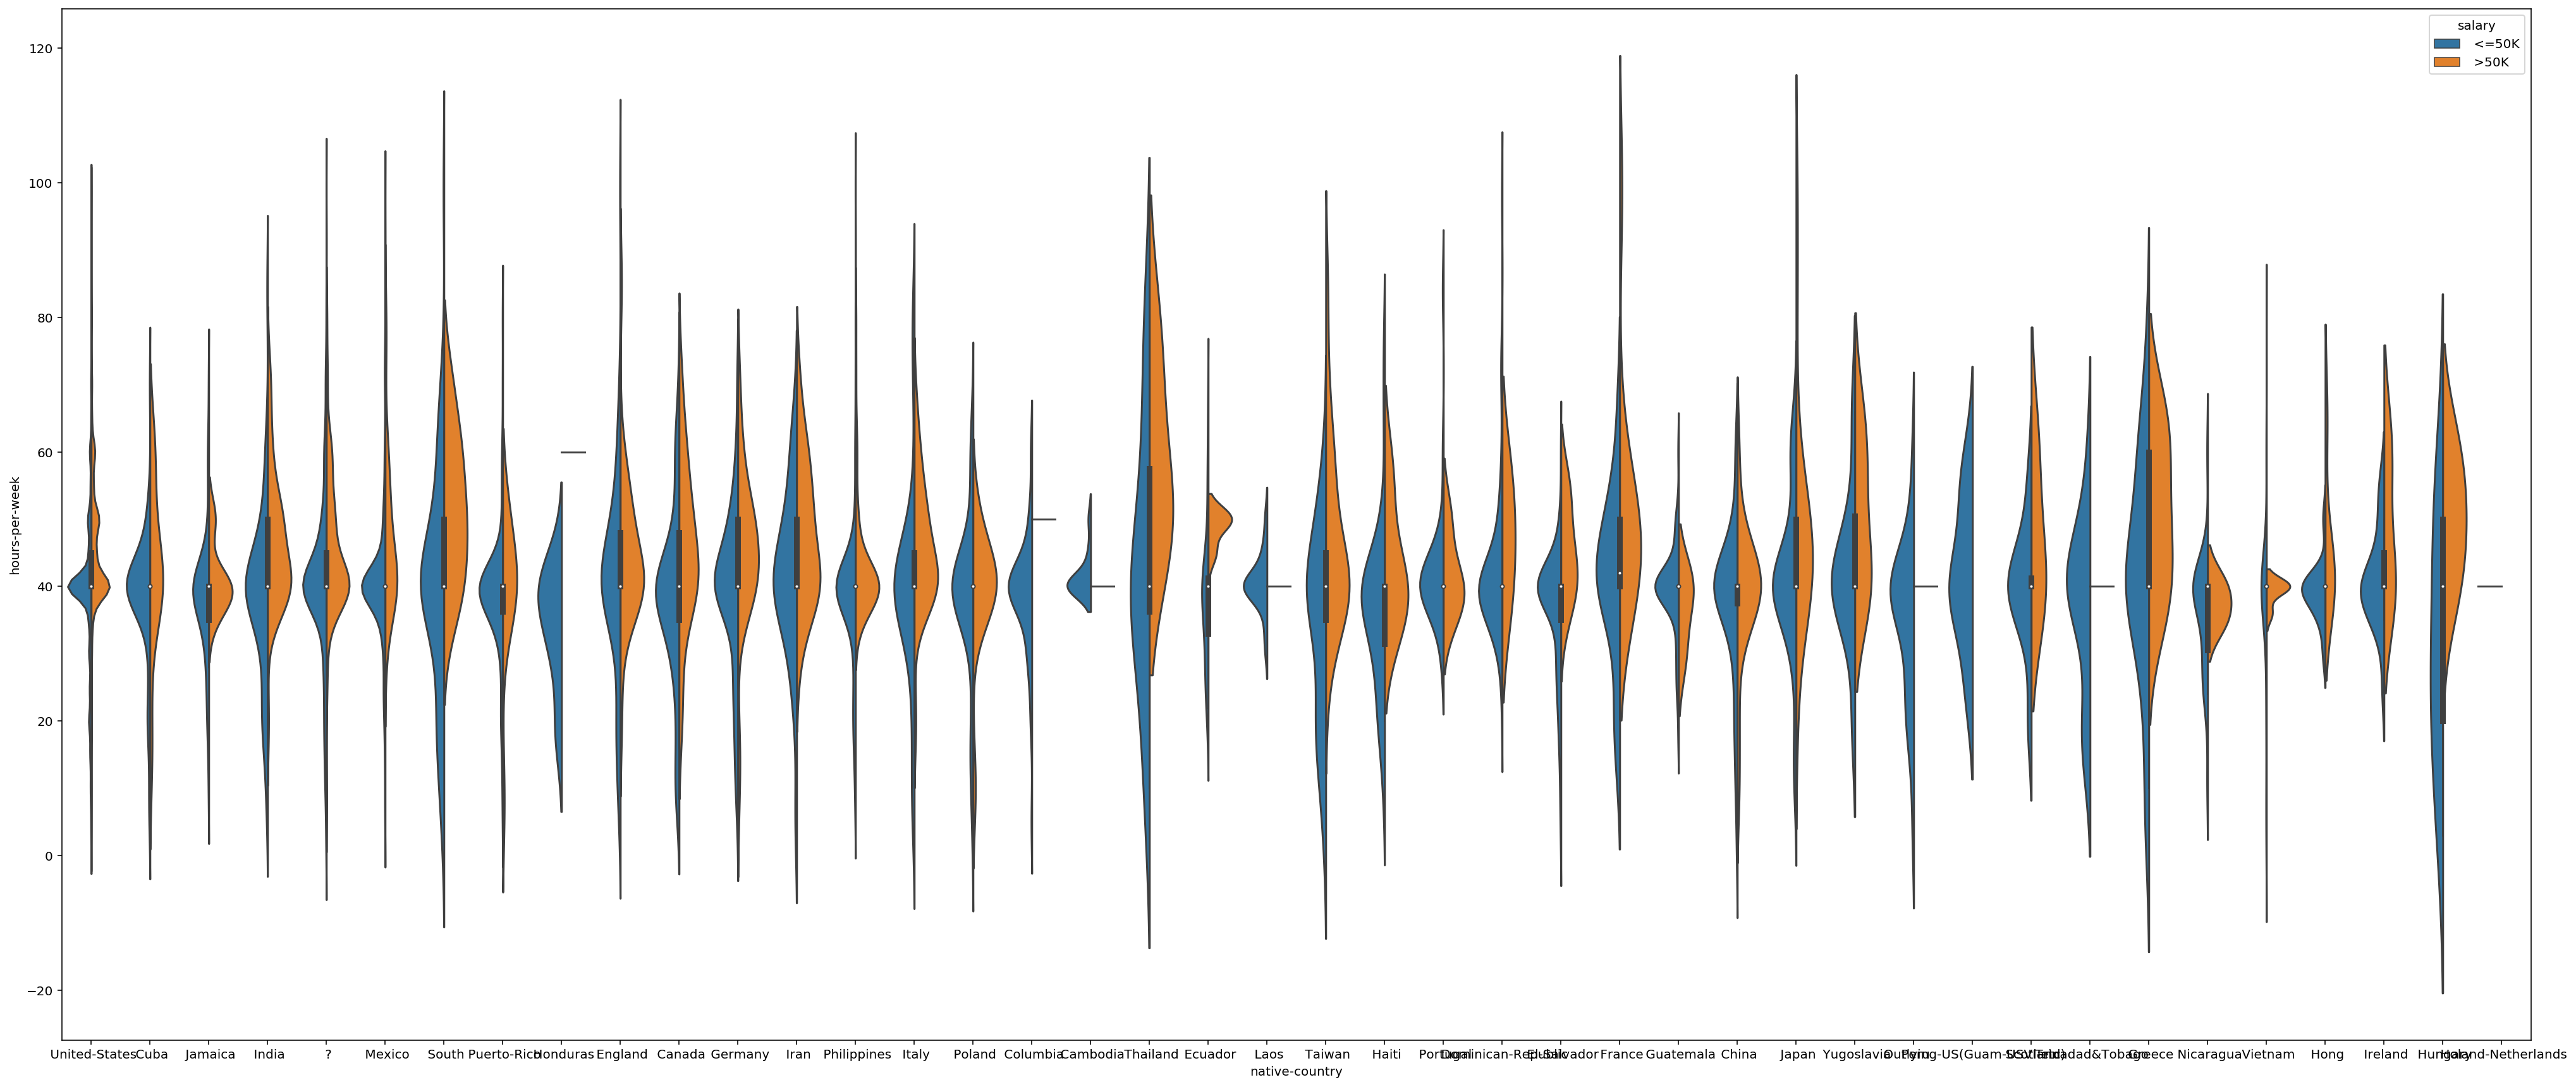

In [195]:
sns.violinplot("native-country","hours-per-week", hue="salary", data=data,split=True)
fig=plt.gcf()
fig.set_size_inches(35,15)